In [1]:
import pandas as pd
import os
import re

In [2]:
folders = os.listdir("ALL_STOCKMARKET_DATA_2020_24/IT_SECTOR_2020_24")
folders.remove('.DS_Store')
folders

['COMMUNICATIONS_EQUIPMENT',
 'CONSUMER_ELECTRONICS',
 'DATA_PROCESSING',
 'ELECTRONIC_EQUIPMENT',
 'INTERNET_SERVICES',
 'IT_SERVICES',
 'SEMICONDUCTORS',
 'SOFTWARE',
 'TECHNOLOGY_HARDWARE']

In [3]:
all_year_data = pd.DataFrame()

for folder in folders:
    #print(folder)
    # loop through years
    for year in range(2020, 2025):
        #print(year)
        files = os.listdir(f"ALL_STOCKMARKET_DATA_2020_24/IT_SECTOR_2020_24/{folder}/{year}")
        #print(files)
        # load each file
        for file in files:
            data = pd.read_csv(f"ALL_STOCKMARKET_DATA_2020_24/IT_SECTOR_2020_24/{folder}/{year}/{file}")
            ticker_name = re.findall('(\w*)_\d{4}\.csv', file)[0]
            data = data.assign(Ticker=ticker_name)
            all_year_data = pd.concat([all_year_data, data])

all_year_data

,Unnamed: 0,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,Index,Ticker
0,2020-01-02,205.68,207.235,203.10,204.72,51.1800,624527,0.0,1.0,Communications_Equipment,ANET
1,2020-01-03,200.00,203.830,198.48,200.85,50.2125,766873,0.0,1.0,Communications_Equipment,ANET
2,2020-01-06,198.79,203.170,198.00,202.86,50.7150,516039,0.0,1.0,Communications_Equipment,ANET
3,2020-01-07,202.86,205.430,201.30,204.85,51.2125,532930,0.0,1.0,Communications_Equipment,ANET
4,2020-01-08,204.85,207.790,204.63,206.98,51.7450,673786,0.0,1.0,Communications_Equipment,ANET
...,...,...,...,...,...,...,...,...,...,...,...
161,2024-08-22,64.79,65.490,63.85,64.04,64.0400,3177693,0.0,1.0,Technology_Hardware,WDC
162,2024-08-23,64.25,65.035,63.45,64.35,64.3500,3045446,0.0,1.0,Technology_Hardware,WDC
163,2024-08-26,63.89,64.290,62.43,62.69,62.6900,3247198,0.0,1.0,Technology_Hardware,WDC
164,2024-08-27,61.83,63.100,61.16,62.85,62.8500,5045809,0.0,1.0,Technology_Hardware,WDC


In [4]:
all_year_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38676 entries, 0 to 165
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         38676 non-null  object 
 1   Open               38676 non-null  float64
 2   High               38676 non-null  float64
 3   Low                38676 non-null  float64
 4   Close              38676 non-null  float64
 5   Adjusted Close     38676 non-null  float64
 6   Volume             38676 non-null  int64  
 7   Dividend Amount    38676 non-null  float64
 8   Split Coefficient  38676 non-null  float64
 9   Index              38676 non-null  object 
 10  Ticker             38676 non-null  object 
dtypes: float64(7), int64(1), object(3)
memory usage: 3.5+ MB


In [6]:
all_year_data['Unnamed: 0'] = pd.to_datetime(all_year_data['Unnamed: 0'])
all_year_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38676 entries, 0 to 165
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Unnamed: 0         38676 non-null  datetime64[ns]
 1   Open               38676 non-null  float64       
 2   High               38676 non-null  float64       
 3   Low                38676 non-null  float64       
 4   Close              38676 non-null  float64       
 5   Adjusted Close     38676 non-null  float64       
 6   Volume             38676 non-null  int64         
 7   Dividend Amount    38676 non-null  float64       
 8   Split Coefficient  38676 non-null  float64       
 9   Index              38676 non-null  object        
 10  Ticker             38676 non-null  object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 3.5+ MB


In [15]:
all_year_data.rename(columns={"Unnamed: 0": "date"}, inplace=True)
all_year_data = all_year_data.sort_values(by='date')
all_year_data['MA_5'] = all_year_data['Close'].rolling(window=5).mean().shift(1)
all_year_data = all_year_data.dropna(subset=['MA_5'])
all_year_data

,date,Open,High,Low,Close,Adjusted Close,Volume,Dividend Amount,Split Coefficient,Index,Ticker,MA_5
0,2020-01-02,261.08,266.600,261.080,266.16,258.140227,1124553,0.0,1.0,Software,INTU,443.528
0,2020-01-02,64.20,65.980,64.200,65.62,64.776555,6671068,0.5,1.0,Technology_Hardware,WDC,223.024
0,2020-01-02,29.32,30.000,29.300,29.99,26.139408,5627445,0.0,1.0,Electronic_Equipment,GLW,218.620
0,2020-01-02,46.86,49.250,46.630,49.10,49.100000,80764599,0.0,1.0,Semiconductors,AMD,164.548
0,2020-01-02,319.32,322.500,317.320,322.39,28.150049,1966411,0.0,1.0,Semiconductors,AVGO,114.298
...,...,...,...,...,...,...,...,...,...,...,...,...
165,2024-08-28,128.12,128.330,122.640,125.61,125.610000,448101115,0.0,1.0,Semiconductors,NVDA,183.376
165,2024-08-28,149.40,150.430,144.720,146.36,146.360000,34075823,0.0,1.0,Semiconductors,AMD,176.862
165,2024-08-28,110.30,112.070,108.210,111.56,111.560000,9527976,0.0,1.0,Technology_Hardware,DELL,170.118
165,2024-08-28,77.29,78.165,76.675,76.87,76.870000,1990281,0.0,1.0,IT_Services,CTSH,124.952


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
all_year_data['MA_5_scaled'] = scaler.fit_transform(all_year_data[['MA_5']])


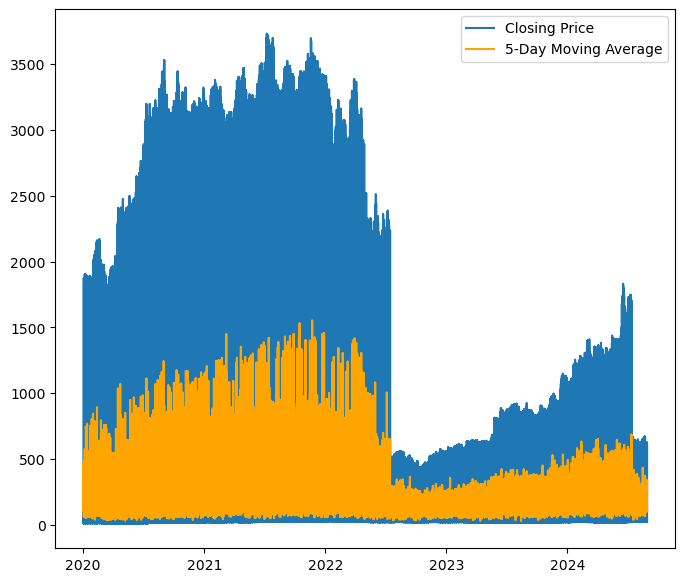

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,7))
plt.plot(all_year_data['date'], all_year_data['Close'], label='Closing Price')
plt.plot(all_year_data['date'], all_year_data['MA_5'], label='5-Day Moving Average', color='orange')
plt.legend()
plt.show()